In [58]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from CHAMP.DataLoader import LoadData
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP, DisplayConvergenceClassif
from CHAMP.DataTools import ChangeBatchSize
from CHAMP.CHAMP_Layer import ConvMP
from CHAMP.DataTools import GenerateGabor, Rebuilt
import matplotlib.pyplot as plt
from CHAMP.LowLevel import conv
from CHAMP.Classif_Layer import Classif_Layer
import os
from CHAMP.DataTools import SaveNetwork, LoadNetwork
home = os.getenv('HOME')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
l0 = 100
nb_dico = 8
dico_size = (7,7)
image_size = (88,88)
OutputL1_size =tuple(image_size[i]-dico_size[i]+1 for i in range(len(dico_size)))
saving_path = 'Records/'
SaveExp=True

# On Face DataBase

## Load the DataBase

In [24]:
path = "../../../Science/These/Rapport d'avancement/database/Face_DataBase/"
#path = home + "/science/VB_These/Rapport d'avancement/database/Face_DataBase/"
training_set,testing_set = LoadData('Face',data_path=path,avg_size=(5,5))

In [25]:
print(training_set[0].size())

torch.Size([1, 400, 1, 88, 88])


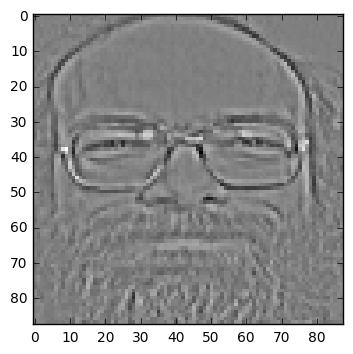

In [26]:
plot = plt.imshow(training_set[0][0,0,0,:,:].numpy(),cmap='gray')

## Generate Filters

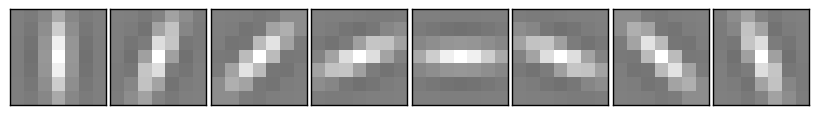

In [27]:
DicoGabor = GenerateGabor(nb_dico=nb_dico,dico_size=dico_size,sigma=1,lambd=5,gamma=0.5,psi=0)
DisplayDico(DicoGabor)

## Coding

In [28]:
code = ConvMP(image_input=training_set[0][0,:,:,:,:], dictionary=DicoGabor, l0_sparseness=l0,
                modulation=None, verbose=0, train=True, doSym='pos', mask=None,\
                MaskMod='Residual')

In [29]:
reconstructed_image = Rebuilt(training_set[0][0,:,:,:,:],code,DicoGabor)

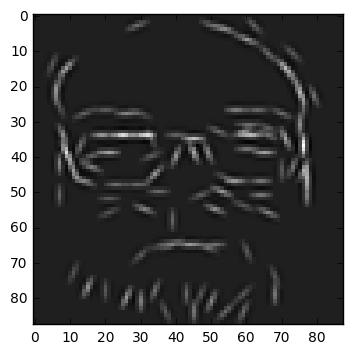

In [30]:
plt.imshow(reconstructed_image[0,0,:,:].numpy(),cmap='gray')

In [31]:
residual=training_set[0][0,:,:,:,:]-reconstructed_image

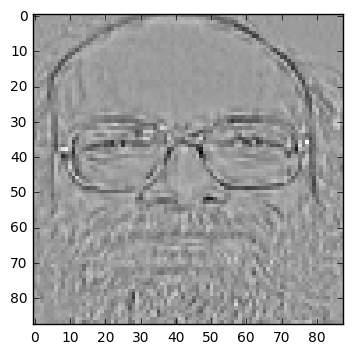

In [32]:
plt.imshow(residual[0,0,:,:].numpy(),cmap='gray')

## Classifying Raw Data

In [61]:
batch_training_set = ChangeBatchSize(training_set,batch_size=400)

In [68]:
from CHAMP.Classif_Layer import Classif_Layer
if SaveExp == True:
    Classifier_Raw = Classif_Layer(nb_dico=1,size_image=image_size,nb_categories=40, verbose=0)
    Classifier_Raw = Classifier_Raw.train_classif(batch_training_set,nb_epoch=100,data_test_loader=training_set,lr=0.005)
    SaveNetwork(Classifier_Raw, saving_path+'FaceDB_ClassifRaw.pkl')
else : 
    Classifier_Raw = LoadNetwork(saving_path+'FaceDB_ClassifRaw.pkl')

file saved


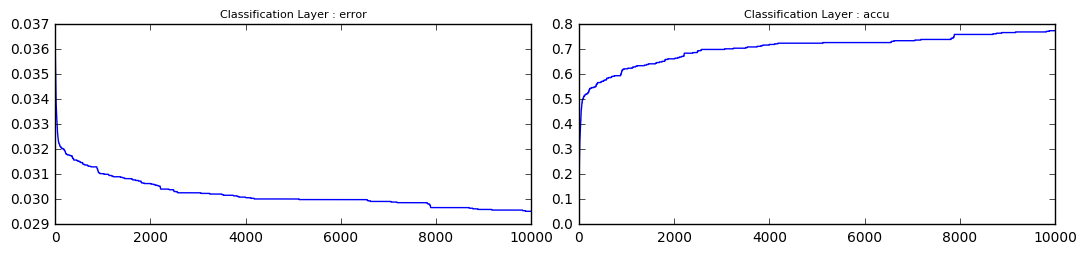

In [57]:
DisplayConvergenceClassif(Classifier_Raw, to_display=['error','accu'])

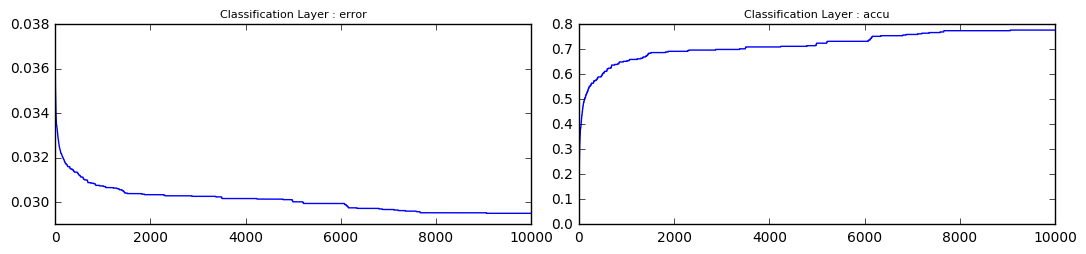

In [55]:
DisplayConvergenceClassif(Classifier_Raw, to_display=['error','accu'])

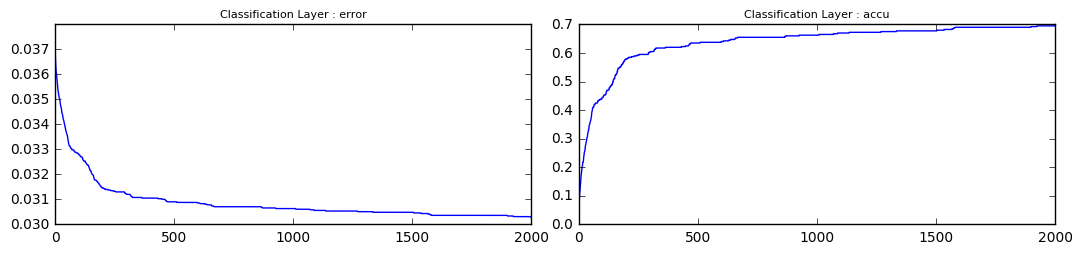

In [52]:
DisplayConvergenceClassif(Classifier_Raw, to_display=['error','accu'])

In [48]:
from CHAMP.Classif_Layer import Classif_Layer
Classifier_Raw = Classif_Layer(nb_dico=1,size_image=image_size,nb_categories=40, verbose=0)
a = Classifier_Raw.train_classif(batch_training_set,nb_epoch=10000,data_test_loader=training_set,lr=0.004)

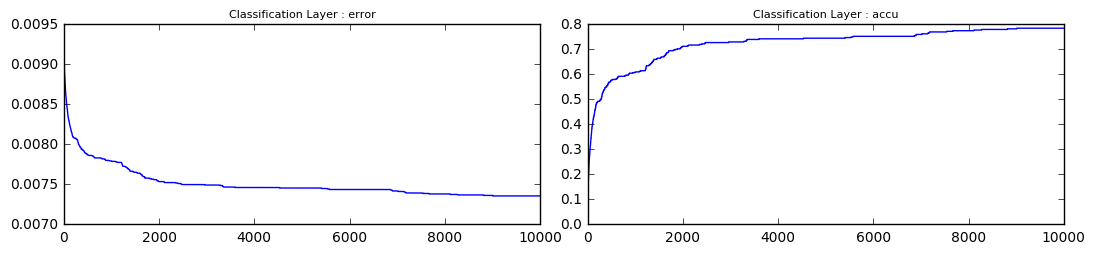

In [49]:
DisplayConvergenceClassif(Classifier_Raw, to_display=['error','accu'])

## Classifying Output of One CHAMP Layer

In [ ]:
output_Layer1 = (code.to_dense().unsqueeze(0),training_set[1])

In [ ]:
from CHAMP.Classif_Layer import Classif_Layer
Classifier_CHAMP = Classif_Layer(nb_dico=8,size_image=(60,60), nb_categories=40, verbose=0)
Classifier_CHAMP = Classifier_CHAMP.train_classif(output_Layer1,nb_epoch=500,data_test_loader=output_Layer1,lr=0.001)

In [ ]:
DisplayConvergenceClassif(Classifier_CHAMP, to_display=['error','accu'])

## Classyfing output of Convolutional Layer

In [ ]:
Output = conv(training_set[0][0,:,:,:,:], DicoGabor)
output_ConvLayer1 = (Output.unsqueeze(0),training_set[1])

In [ ]:
from CHAMP.Classif_Layer import Classif_Layer
Classifier_CONV = Classif_Layer(nb_dico=8,size_image=(60,60), nb_categories=40, verbose=0)
Classifier_CONV = Classifier_CONV.train_classif(output_ConvLayer1,nb_epoch=20000,data_test_loader=output_ConvLayer1,lr=0.0001)

In [ ]:
DisplayConvergenceClassif(Classifier_CONV, to_display=['error','accu'])